In [1]:
import sys
sys.path.insert(0, '.')
from utils import *

# extra import for interactive plot!
from ipywidgets import interact


In [26]:
import pandas as pd
data = pd.read_csv("./data/assignment_mle.csv",  usecols = ['date','covid infection probability'] )
data = data.rename(columns={'covid infection probability': 'covid_infection_probability'})
data.head()

,date,covid_infection_probability
0,4/1/21,27.388075
1,4/1/21,48.188489
2,4/1/21,37.279689
3,4/1/21,32.792376
4,4/1/21,48.695297


In [38]:
data["covid_infection_probability"].isnull().sum()

data["date"] = pd.to_datetime(data["date"])

In [44]:
model=smf.ols(' covid_infection_probability ~ date', data=data).fit()
# results = model
# print(results.summary())

In [53]:
models = (
    data.groupby('date')
    .pipe(summarize, lambda x: dict(trend_model = smf.ols( 'covid_infection_probability ~ date', data=data).fit()
    ))
)

models

KeyboardInterrupt: 

AttributeError: 'DataFrame' object has no attribute 'trend_model'

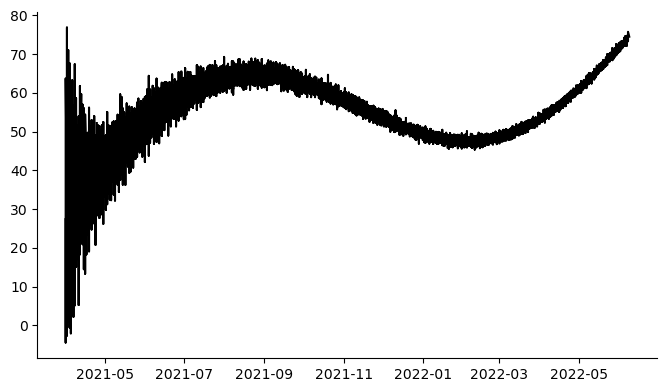

In [50]:
fig, ax = plt.subplots()
ax.plot(data.date, data.covid_infection_probability, color='k')
m = models.trend_model[covid_infection_probability]
x = pd.DataFrame(dict(Year=np.arange(2018, 2030)))
pred95 = m.get_prediction(x["Year"]).summary_frame()
pred80 = m.get_prediction(x).summary_frame(alpha=.2)
ax.plot(x.Year, pred80['mean'])
ax.fill_between(x.Year, pred95.obs_ci_lower, pred95.obs_ci_upper, color='C0', alpha=.5)
ax.fill_between(x.Year, pred80.obs_ci_lower, pred80.obs_ci_upper, color='C0', alpha=.5)
plt.grid();
m.predict(x["Year"])

In [4]:
len(data)

18500

In [5]:
data.date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 18500 entries, 0 to 18499
Series name: date
Non-Null Count  Dtype 
--------------  ----- 
18378 non-null  object
dtypes: object(1)
memory usage: 144.7+ KB


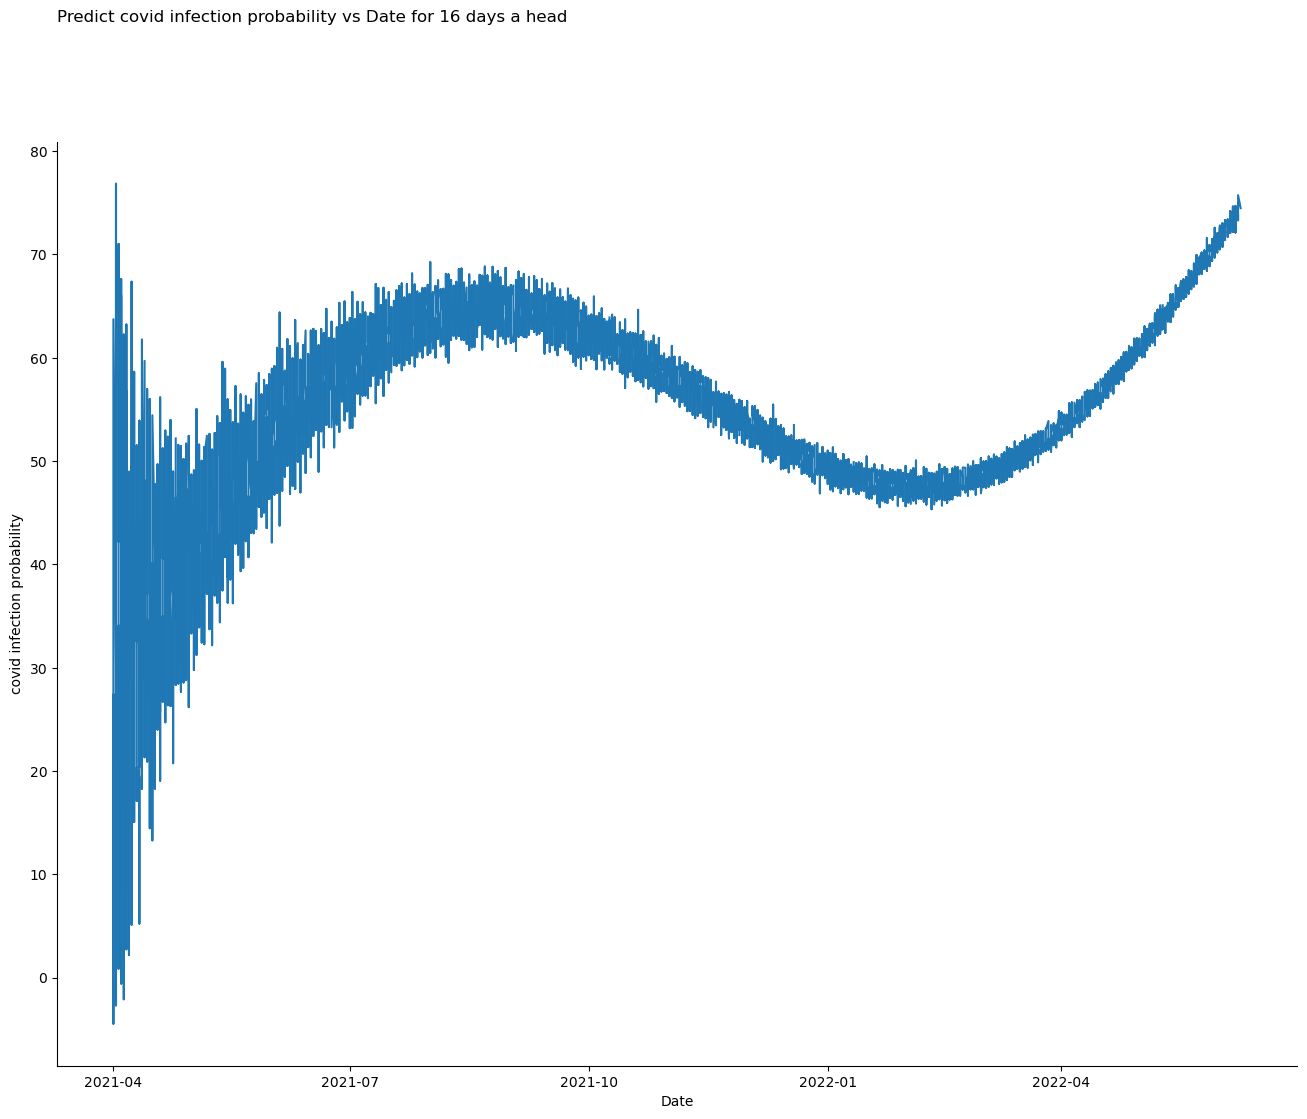

In [13]:
import seaborn as sb
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# time series plot for multiple columns
fig, ax = plt.subplots(figsize=(16, 12))


data["date"] = pd.to_datetime(data["date"])

date = data["date"]
value = data['covid infection probability']

ax.plot(date, value);
half_year_locator = mdates.MonthLocator((1,4,7,10))
ax.xaxis.set_major_locator(half_year_locator) # Locator for major axis only.


# set label
suptitle('Predict covid infection probability vs Date for 16 days a head')
plt.xlabel("Date")
plt.ylabel("covid infection probability")


plt.show();

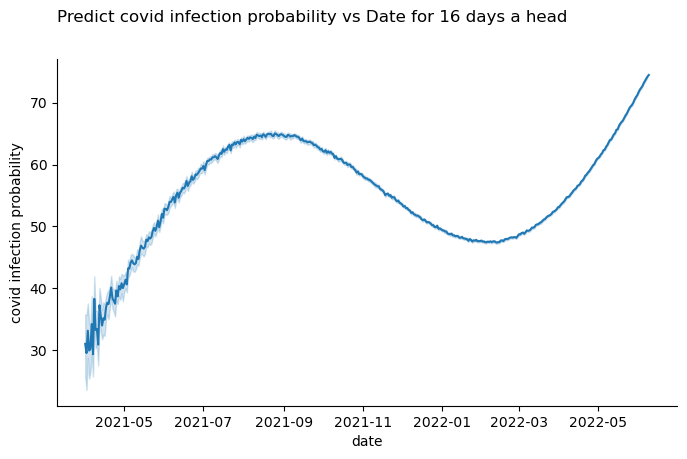

In [14]:
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
data["date"] = pd.to_datetime(data["date"])
# time series plot for multiple columns
sb.lineplot(x="date", y="covid infection probability", data=data)

# set label
suptitle('Predict covid infection probability vs Date for 16 days a head')

plt.show();

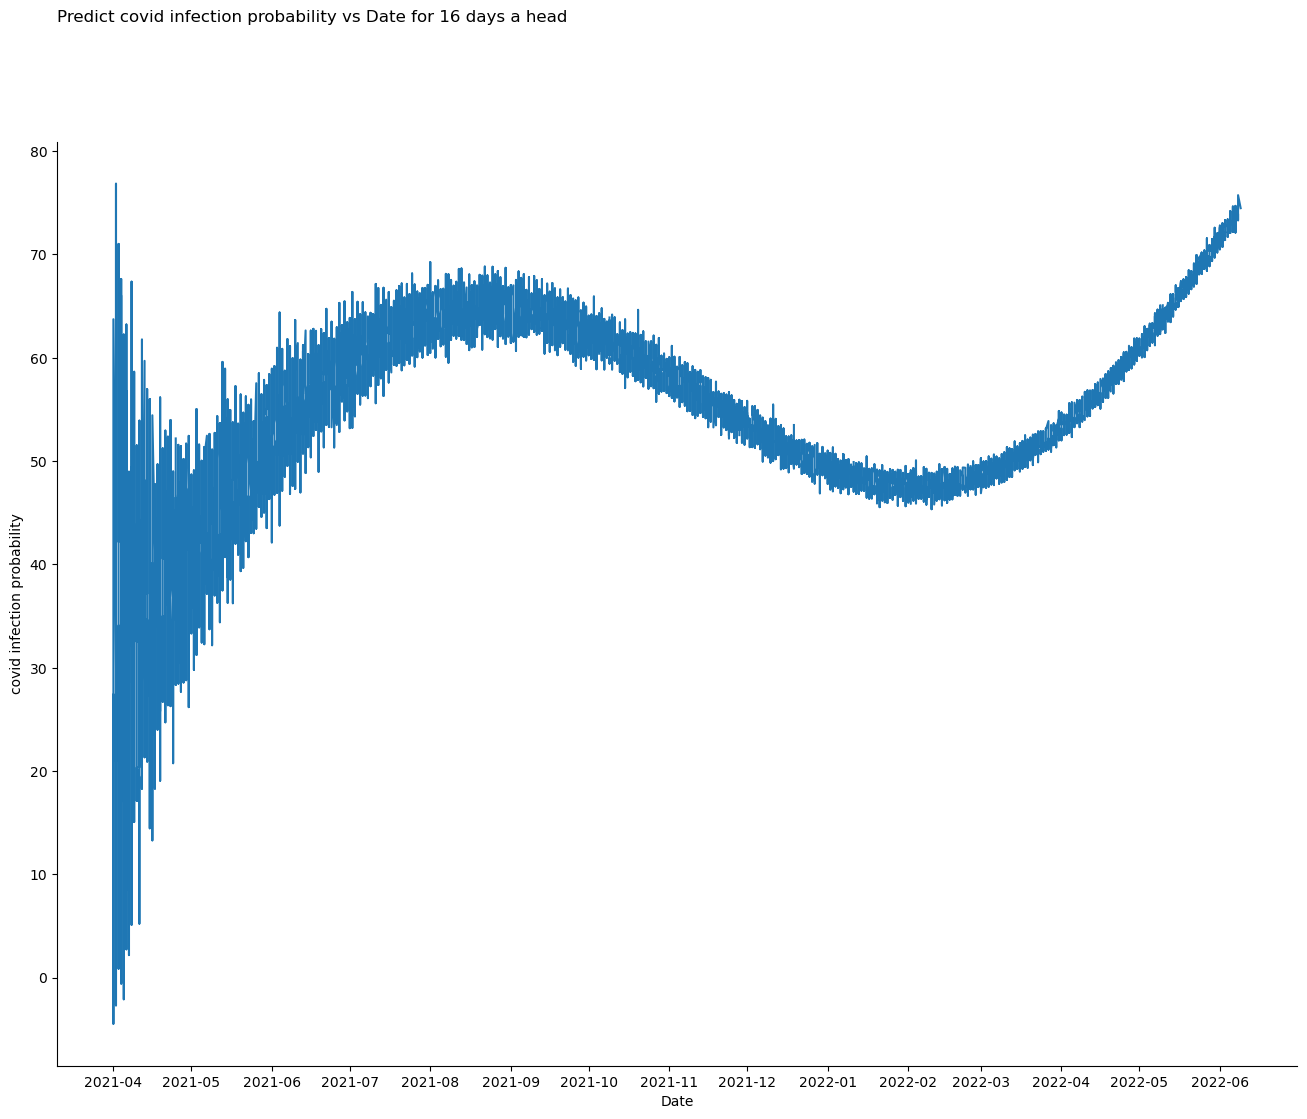

In [10]:
import seaborn as sb
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# time series plot for multiple columns
fig, ax = plt.subplots(figsize=(16, 12))



data["date"] = pd.to_datetime(data["date"])

date = data["date"]
value = data['covid infection probability']

ax.plot(date, value);
half_year_locator = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_locator(half_year_locator) # Locator for major axis only.


# set label
suptitle('Predict covid infection probability vs Date for 16 days a head')
plt.xlabel("Date")
plt.ylabel("covid infection probability")


plt.show();

In [79]:
# fig, ax = plt.subplots()
ax.plot(data["covid infection probability"])
ax.plot(data["covid infection probability"].rolling(5, center=True).mean())
ax.set(ylabel='Covid 19')
ax.grid()

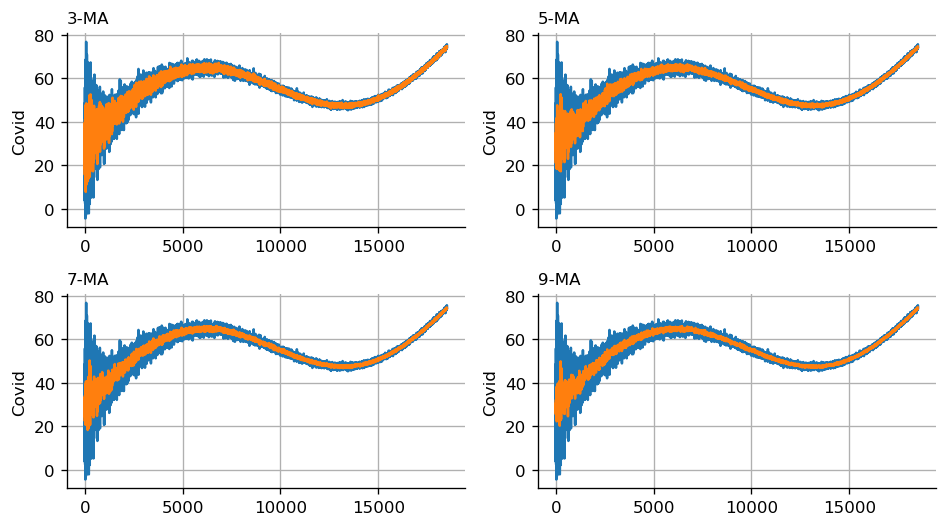

In [80]:
fig, axs = plt.subplots(2, 2)
rolls = 3, 5, 7, 9
for (ax, roll) in zip(axs.ravel(), rolls):
    ax.plot(data["covid infection probability"])
    ax.plot(data["covid infection probability"].rolling(roll, center=True).mean())
    ax.set(ylabel='Covid', title=f'{roll}-MA')
    ax.grid()
plt.tight_layout()

In [81]:
data["2-MA"]=(
    data["covid infection probability"]
    .rolling(1, center=True).mean()
    .rolling(2, center=True).mean()
)


data["2x4-MA"]=(
    data["covid infection probability"]
    .rolling(4, center=True).mean()
    .rolling(1, center=True).mean()
)
data[["covid infection probability" , "2-MA" , "2x4-MA"]].head()

,covid infection probability,2-MA,2x4-MA
0,27.388075,NaN,NaN
1,48.188489,37.788282,NaN
2,37.279689,42.734089,36.412157
3,32.792376,35.036033,41.738963
4,48.695297,40.743836,30.617342


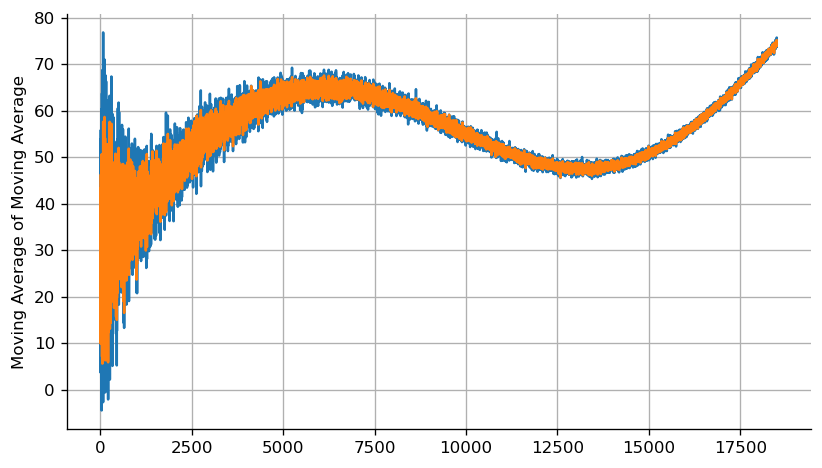

In [82]:
fig, ax = plt.subplots()
ax.plot(data["covid infection probability"])
ax.plot(data["2-MA"])
# ax.plot(aus_production["2x4-MA"]) 
ax.set(ylabel='Moving Average of Moving Average')
ax.grid()

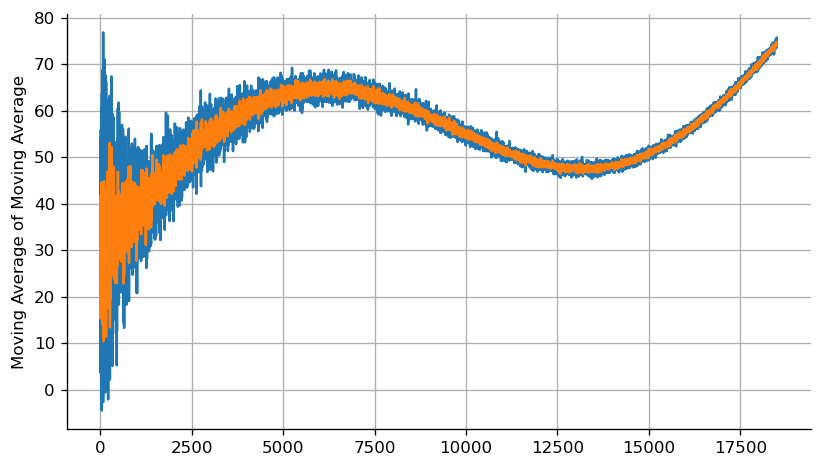

In [83]:
fig, ax = plt.subplots()
ax.plot(data["covid infection probability"])
ax.plot(data["2x4-MA"]) 
ax.set(ylabel='Moving Average of Moving Average')
ax.grid()